In [21]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [22]:
df=pd.read_csv("/kaggle/input/anaemia-prediction-dataset/file_.csv")
df2=pd.read_csv("/kaggle/input/anaemia-prediction-dataset/expanded_output.csv")
df3=pd.read_csv("/kaggle/input/anaemia-prediction-dataset/d_output.csv")
df3

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.170845,30.945626,25.921971,6.252659,Yes
1,2,F,43.163481,30.306974,26.759843,8.578865,Yes
2,3,F,46.269997,27.315656,26.028556,9.640936,Yes
3,4,F,45.054787,30.469816,24.460797,4.794217,Yes
4,5,M,45.061884,31.218572,24.071714,8.865329,Yes
...,...,...,...,...,...,...,...
495,496,F,45.749211,27.630846,26.865636,13.760084,No
496,497,F,44.929398,30.271085,24.501944,11.588917,No
497,498,F,43.452565,29.784122,26.764283,12.460060,No
498,499,F,43.224231,29.742489,26.866944,12.074058,No


concatenate datasets

In [23]:
new_df=pd.concat([df,df2,df3],axis=0)
new_df

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.970000,28.360000,26.410000,5.150000,Yes
1,2,F,44.010000,29.220000,27.330000,7.970000,Yes
2,3,F,47.770000,27.730000,24.610000,9.140000,Yes
3,4,F,45.960000,30.690000,25.190000,4.000000,Yes
4,5,M,46.910000,31.260000,22.210000,9.900000,Yes
...,...,...,...,...,...,...,...
495,496,F,45.749211,27.630846,26.865636,13.760084,No
496,497,F,44.929398,30.271085,24.501944,11.588917,No
497,498,F,43.452565,29.784122,26.764283,12.460060,No
498,499,F,43.224231,29.742489,26.866944,12.074058,No


In [24]:
new_df["Anaemic"].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
new_df.isnull().sum().sum()

0

In [26]:
new_df.dtypes

Number            int64
Sex              object
%Red Pixel      float64
%Green pixel    float64
%Blue pixel     float64
Hb              float64
Anaemic          object
dtype: object

In [27]:
label_encod=LabelEncoder()
new_df["Sex_encod"]=label_encod.fit_transform(new_df["Sex"])
new_df["Anaemic_encod"]=label_encod.fit_transform(new_df["Anaemic"])
x=new_df.drop(columns=["Number","Sex","Anaemic"])
# print(x is x)

divide data into X and Y component

In [28]:
X=x.drop(columns=["Anaemic_encod"])
Y=x["Anaemic_encod"]

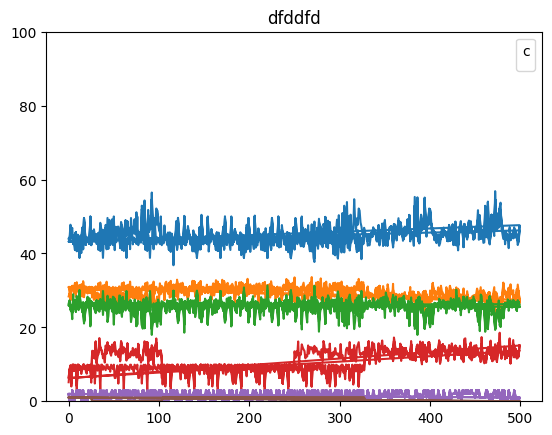

In [29]:
plt.plot(x)
plt.ylim(0,100)
plt.legend(title=("c"))
plt.title("dfddfd")
plt.show()


In [30]:
sd=x.corr()

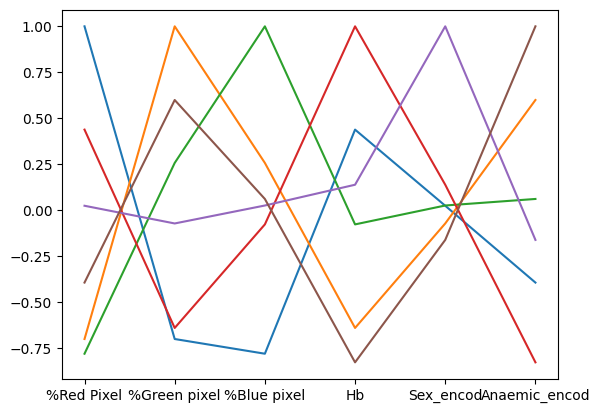

In [31]:
plt.plot(sd)
plt.show()

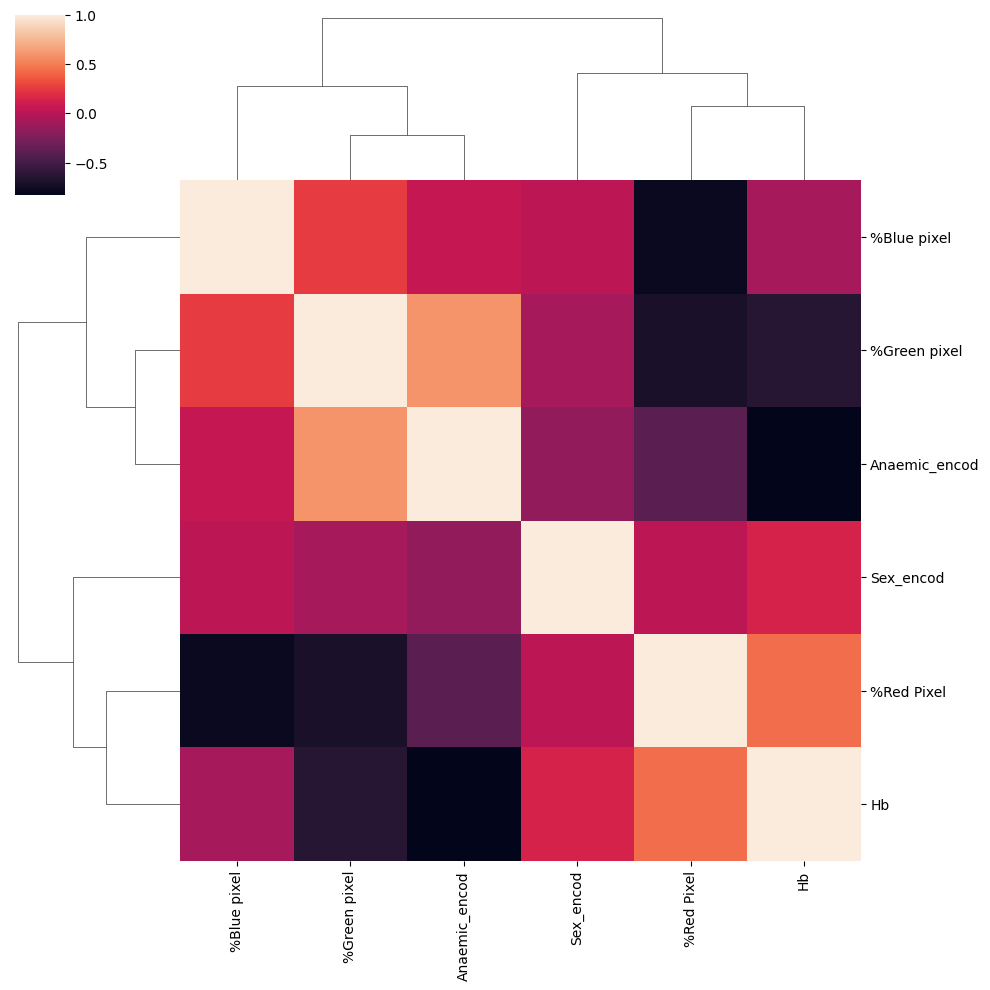

In [32]:
sns.clustermap(sd)

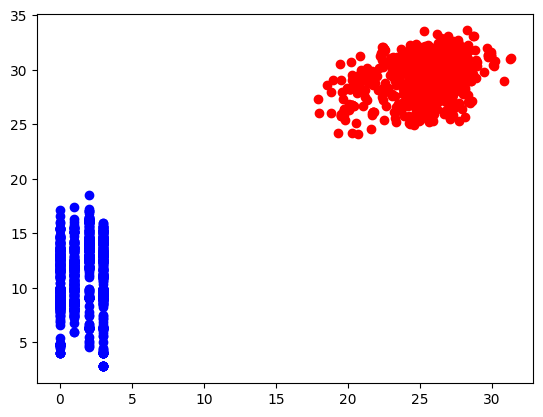

In [33]:
plt.scatter(x["%Blue pixel"],x["%Green pixel"],c="red")
plt.scatter(x["Sex_encod"],x["Hb"],c="blue")
# plt.ylim(0,1.0)/
# plt.xlim(-0.75,0.25)
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x7809ec637c10>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7809ec7c3730>,
 'cmins': <matplotlib.collections.LineCollection at 0x7809ec6621d0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7809ec662620>}

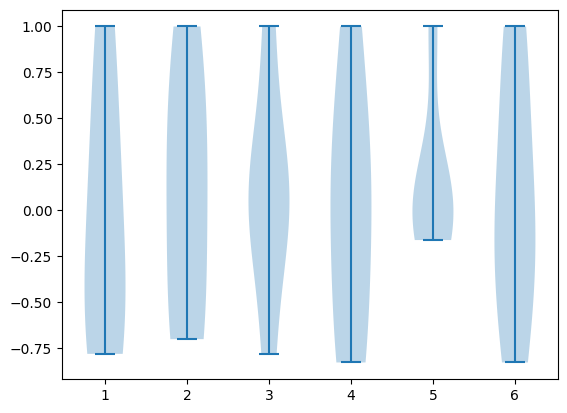

In [34]:
plt.violinplot(sd)

Train_test_split

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [36]:
X_train.shape

(1200, 5)

In [37]:
random_class=RandomForestClassifier(n_estimators=50)
random_class.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=50)

In [38]:
random_class.score(X_test,Y_test)

1.0

# # Deep learning

In [39]:
from keras.layers import Dense,Input,Dropout,Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [40]:
early_stopping=EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1
)

In [41]:
model=Sequential([
    Input(shape=(5,)),
    Dense(64,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [42]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [43]:
model.fit(X_train,Y_train,epochs=100,batch_size=32,validation_data=(X_test,Y_test),validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
38/38 [==============================] - 1s 8ms/step - loss: 0.8691 - accuracy: 0.5067 - val_loss: 0.6998 - val_accuracy: 0.5633
Epoch 2/100
38/38 [==============================] - 0s 3ms/step - loss: 0.6023 - accuracy: 0.6850 - val_loss: 0.5360 - val_accuracy: 0.7433
Epoch 3/100
38/38 [==============================] - 0s 3ms/step - loss: 0.4864 - accuracy: 0.7833 - val_loss: 0.4465 - val_accuracy: 0.7933
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4100 - accuracy: 0.8192 - val_loss: 0.3738 - val_accuracy: 0.8267
Epoch 5/100
38/38 [==============================] - 0s 3ms/step - loss: 0.3479 - accuracy: 0.8467 - val_loss: 0.3285 - val_accuracy: 0.8800
Epoch 6/100
38/38 [==============================] - 0s 3ms/step - loss: 0.3108 - accuracy: 0.8692 - val_loss: 0.2997 - val_accuracy: 0.8800
Epoch 7/100
38/38 [==============================] - 0s 3ms/step - loss: 0.2687 - accuracy: 0.9075 - val_loss: 0.2505 - val_accuracy: 0.9000
Epoch 8/100
3

In [44]:
loss,accuracy=model.evaluate(X_test,Y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.0358 - accuracy: 0.9867


# Quantum Machine Learning

In [45]:
!pip install tensorflow-quantum 


In [46]:
import tensorflow as tf
import tensorflow_quantum as tfq
import cirq
# import keras

In [47]:
import numpy as np
import sympy

In [48]:
def create_dataset():
    x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_train = np.array([0, 1, 1, 0])  # XOR function
    return x_train.astype(np.float32), y_train.astype(np.float32)

x_train, y_train = create_dataset()


In [49]:
def create_quantum_circuits(x_train):
    qubits = [cirq.GridQubit(0, i) for i in range(x_train.shape[1])]
    circuits = []
    for x in x_train:
        circuit = cirq.Circuit()
        for i, value in enumerate(x):
            if value:
                circuit.append(cirq.X(qubits[i]))
        circuits.append(circuit)
    return circuits, qubits

circuits, qubits = create_quantum_circuits(x_train)


In [50]:
def create_model(qubits):
    # Define symbolic parameters
    symbols = sympy.symbols('theta0:2')

    # Create parameterized circuit
    circuit = cirq.Circuit()
    for i, qubit in enumerate(qubits):
        circuit.append(cirq.rx(symbols[i])(qubit))
    
    readout_operators = [cirq.Z(qubit) for qubit in qubits]
    
    inputs = tf.keras.Input(shape=(), dtype=tf.dtypes.string)
    pqc = tfq.layers.PQC(circuit, readout_operators)(inputs)
    
    return tf.keras.Model(inputs=inputs, outputs=pqc)

model = create_model(qubits)


/opt/conda/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [51]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None,)]                 0         
                                                                 
 pqc_3 (PQC)                 (None, 2)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
quantum_data = tfq.convert_to_tensor(circuits)  # Convert circuits to tensor
def hinge_loss(y_true, y_pred):
    return tf.reduce_mean(tf.maximum(1.0 - y_true * y_pred, 0.0))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=hinge_loss,metrics=['accuracy'])


In [53]:
history = model.fit(quantum_data, y_train, epochs=100, verbose=1)
loss = model.evaluate(quantum_data, y_train)
print('Loss:', loss)


Epoch 1/100
1/1 [==============================] - 1s 531ms/step - loss: 1.0000 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 1.0000 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 1.0000 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 1.0000 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 1.0000 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 1.0000 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 1.0000 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 1.0000 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 1.0000 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 1.0000 - accuracy: 0.5000
Epoch 11/100
1/1 [====